📱 Challenge: Social Media Engagement Trends

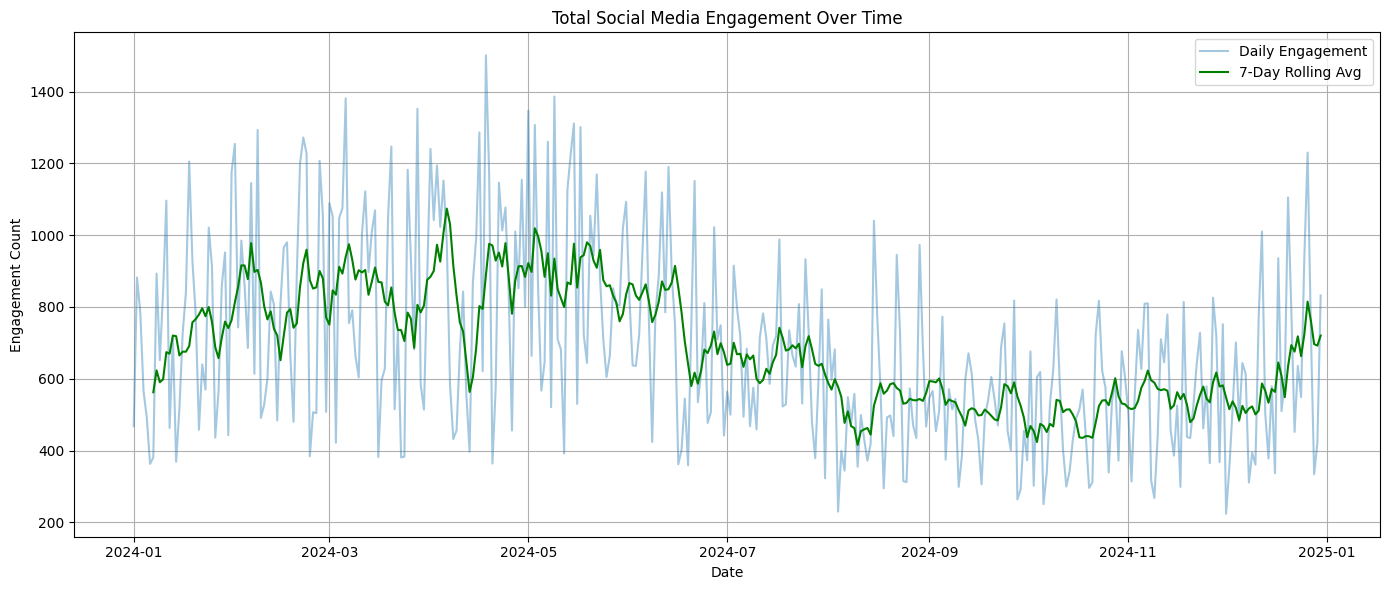

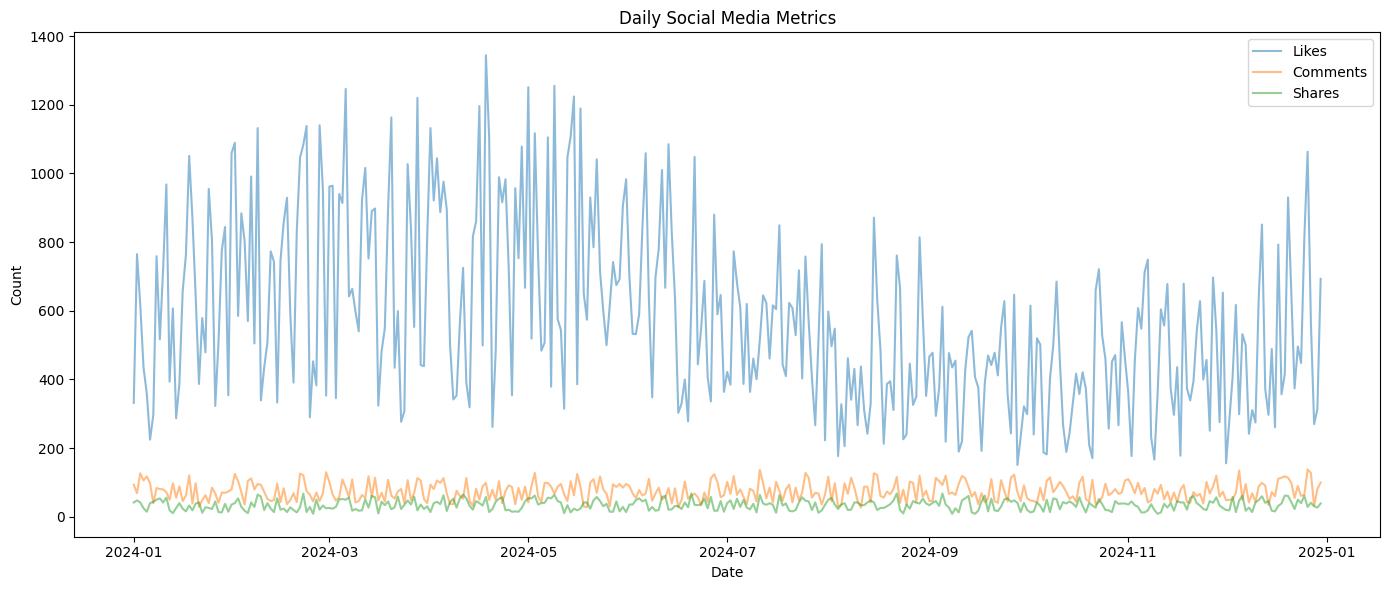

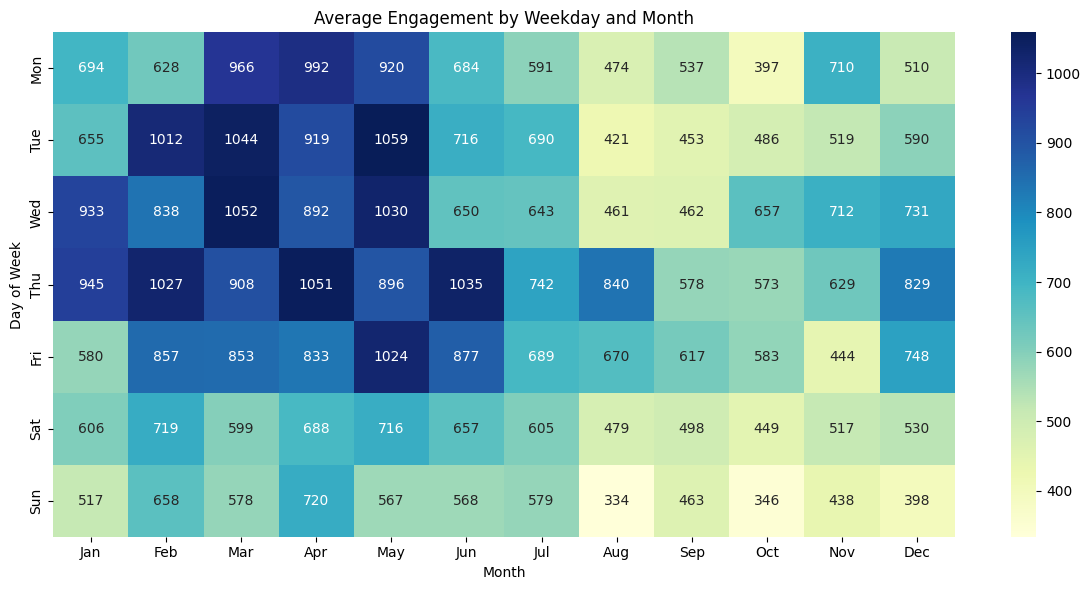

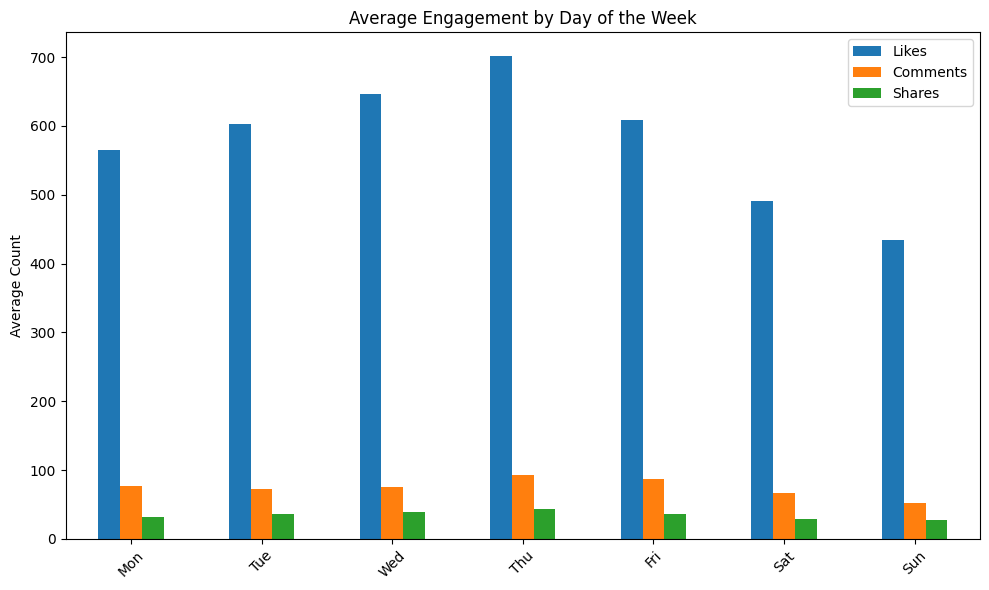

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate 1 year of social media engagement
np.random.seed(42)
date_range = pd.date_range(start="2024-01-01", periods=365, freq='D')
days = np.arange(365)

# Engagement varies by weekday and season
weekday_boost = np.tile([1.1, 1.2, 1.3, 1.4, 1.3, 1.0, 0.9], 53)[:365]  # higher midweek, lower weekends
seasonal_boost = 1 + 0.3 * np.sin(2 * np.pi * days / 365)  # higher engagement in spring/summer

likes = (np.random.randint(200, 800, size=365) * weekday_boost * seasonal_boost).astype(int)
comments = (np.random.randint(30, 100, size=365) * weekday_boost).astype(int)
shares = (np.random.randint(10, 50, size=365) * weekday_boost).astype(int)

df_social = pd.DataFrame({
    'Date': date_range,
    'Likes': likes,
    'Comments': comments,
    'Shares': shares
})
df_social['Total_Engagement'] = df_social[['Likes', 'Comments', 'Shares']].sum(axis=1)
df_social['Weekday'] = df_social['Date'].dt.dayofweek
df_social['Month'] = df_social['Date'].dt.month
df_social['Rolling_Engagement'] = df_social['Total_Engagement'].rolling(window=7).mean()

# 📊 Engagement Over Time
plt.figure(figsize=(14, 6))
plt.plot(df_social['Date'], df_social['Total_Engagement'], alpha=0.4, label='Daily Engagement')
plt.plot(df_social['Date'], df_social['Rolling_Engagement'], color='green', label='7-Day Rolling Avg')
plt.title('Total Social Media Engagement Over Time')
plt.xlabel('Date')
plt.ylabel('Engagement Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 🔍 Individual Metrics
plt.figure(figsize=(14, 6))
plt.plot(df_social['Date'], df_social['Likes'], label='Likes', alpha=0.5)
plt.plot(df_social['Date'], df_social['Comments'], label='Comments', alpha=0.5)
plt.plot(df_social['Date'], df_social['Shares'], label='Shares', alpha=0.5)
plt.title('Daily Social Media Metrics')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

# 🔥 Heatmap - Weekday vs Month
engagement_heatmap = df_social.pivot_table(values='Total_Engagement', index='Weekday', columns='Month', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(engagement_heatmap, cmap='YlGnBu', annot=True, fmt='.0f',
            xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
            yticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Average Engagement by Weekday and Month')
plt.xlabel('Month')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

# 📅 Average Engagement by Day of Week
weekday_avg = df_social.groupby('Weekday')[['Likes', 'Comments', 'Shares']].mean()
weekday_avg.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_avg.plot(kind='bar', figsize=(10, 6))
plt.title('Average Engagement by Day of the Week')
plt.ylabel('Average Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()